In [1]:
from sklearn import metrics
s1 = [0,1,1,1,0,0,0,1]
t1 = [0,1,0,1,0,1,0,0]
acc = metrics.accuracy_score(s1, t1)
print(acc)

0.625


In [2]:
def acc_handmade(y_true, y_pred):
    assert len(y_true)==len(y_pred), "insure the length is equal"
    counter = 0
    for y_t, y_p in zip(y_true, y_pred):
        if y_t == y_p:
            counter+=1

    return counter/len(y_true)
print(acc_handmade(s1, t1))

0.625


In [3]:
def tp_hand(y_true, y_pred):
    assert len(y_true)==len(y_pred), "insure the length is equal"
    count=0
    for y_t, y_p in zip(y_true, y_pred):
        if (y_t*y_p)==1:
            count+=1
    return count

def tn_hand(y_true, y_pred):
    assert len(y_true)==len(y_pred), "insure the length is equal"
    count=0
    for y_t, y_p in zip(y_true, y_pred):
        if ((1-y_t)*(1-y_p))==1:
            count+=1
    return count

def fp_hand(y_true, y_pred):
    assert len(y_true)==len(y_pred), "insure the length is equal"
    count=0
    for y_t, y_p in zip(y_true, y_pred):
        if ((1-y_t)*(y_p))==1:
            count+=1
    return count

def fn_hand(y_true, y_pred):
    assert len(y_true)==len(y_pred), "insure the length is equal"
    count=0
    for y_t, y_p in zip(y_true, y_pred):
        if ((y_t)*(1-y_p))==1:
            count+=1
    return count

In [4]:
print(tp_hand(s1, t1))
print(fp_hand(s1, t1))
print(fn_hand(s1, t1))
print(tn_hand(s1, t1))

2
1
2
3


In [5]:
def precision_hand(y_true, y_pred):
    assert len(y_true)==len(y_pred), "insure the length is equal"
    tp = tp_hand(y_true, y_pred)
    fp = fp_hand(y_true, y_pred)
    return tp/(tp+fp)
print(precision_hand(s1, t1))

0.6666666666666666


# Handmade ROC

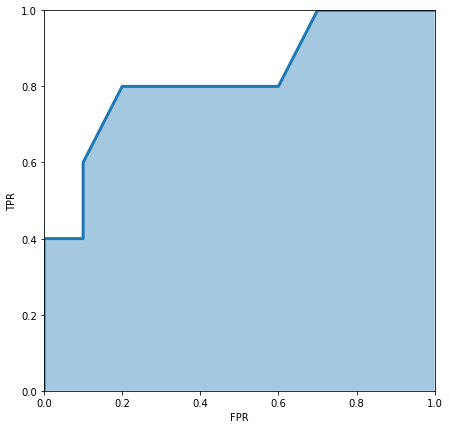

In [6]:
#recall
def tpr_hand(y_true, y_pred):
    tp = tp_hand(y_true, y_pred)
    fn = fn_hand(y_true, y_pred)

    return tp/(tp+fn)

# 1-specificity
def fpr_hand(y_true, y_pred):
    fp = fp_hand(y_true, y_pred)
    tn = tn_hand(y_true, y_pred)
    return fp/(fp+tn)

# Plot ROC
import matplotlib.pyplot as plt
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 
 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 
 0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for thresh in thresholds:
    tmp_pred = [1 if p>=thresh else 0 for p in y_pred]
    tmp_tpr = tpr_hand(y_true, tmp_pred)
    tmp_fpr = fpr_hand(y_true, tmp_pred)
    tpr_list.append(tmp_tpr)
    fpr_list.append(tmp_fpr)


plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## log loss

In [8]:
import numpy as np

def log_loss(y_true, y_proba):
    '''
    Function to calculate log loss
    '''
    # define a epsilon value
    epsilon = 1e-15
    # initialize empty list to store
    # individual losses
    loss = []
    for yt,yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1-epsilon)
        # calculate loss for one sample
        # cross entropy
        temp_loss = -1.0*(yt*np.log(yp)+(1-yt)*np.log(1-yp))
        loss.append(temp_loss)

    return np.mean(loss)

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

0.49882711861432294

In [9]:
# compare build in log loss and handmade
from sklearn import metrics
if(metrics.log_loss(y_true, y_proba)==log_loss(y_true, y_proba)):
    print("wow, you did it!")

wow, you did it!


In [18]:
def macro_precision(y_true, y_pred):
    num_class = len(np.unique(y_true))
    precision_list = []

    for c in range(num_class):
        temp_true = [1 if i==c else 0 for i in y_true]
        temp_pred = [1 if i==c else 0 for i in y_pred]

        #tp = tp_hand(temp_true,temp_pred)
        # precision = tp/(tp+fp)
        precision_list.append(precision_hand(temp_true, temp_pred))

    return np.mean(precision_list)

def micro_precision(y_true, y_pred):
    
    tp = 0
    fp = 0
    num_class = len(np.unique(y_true))
    for c in range(num_class):
        temp_true = [1 if i==c else 0 for i in y_true]
        temp_pred = [1 if i==c else 0 for i in y_pred]
        
        tp += tp_hand(temp_true, temp_pred)
        fp += fp_hand(temp_true, temp_pred)

    return tp/(tp+fp)
        


In [19]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
macro_precision(y_true, y_pred)
micro_precision(y_true, y_pred)

0.4444444444444444

In [20]:
import random

class MarkovChain:
    def __init__(self):
        self.transitions = {}

    def add_transition(self, state1, state2):
        if state1 not in self.transitions:
            self.transitions[state1] = []
        self.transitions[state1].append(state2)

    def generate_sequence(self, start_state, length):
        sequence = [start_state]
        current_state = start_state
        for _ in range(length - 1):
            if current_state in self.transitions:
                next_state = random.choice(self.transitions[current_state])
                sequence.append(next_state)
                current_state = next_state
            else:
                break
        return sequence

# Example usage
mc = MarkovChain()
mc.add_transition('A', 'B')
mc.add_transition('B', 'C')
mc.add_transition('B', 'D')
mc.add_transition('C', 'D')
mc.add_transition('D', 'A')

start_state = 'A'
sequence_length = 10
generated_sequence = mc.generate_sequence(start_state, sequence_length)
print(generated_sequence)

['A', 'B', 'C', 'D', 'A', 'B', 'D', 'A', 'B', 'C']
